<a href="https://colab.research.google.com/github/FuturisticLover123/labs/blob/main/lab9/solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#task1

In [118]:
from sklearn.decomposition import PCA
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
x, y = make_regression(n_samples=10, n_features=10, noise=20, n_informative=2)

In [119]:
PCA(n_components=5).fit_transform(x)

array([[ 3.25135367,  0.72357049, -0.89941662,  0.45693292,  0.87215037],
       [ 0.18990285, -1.87497856,  1.08682963,  1.58162947,  0.91553456],
       [ 1.48277273,  1.156733  , -2.08345392, -0.19100007, -0.66127355],
       [ 0.09078662, -1.05453017,  0.83223599,  0.51119509, -2.08147207],
       [-2.04815564, -1.26715489, -0.14204469, -1.32030226,  0.81560823],
       [-2.77860086, -0.84505208, -2.07497913,  0.71008485, -0.26385268],
       [ 2.36837573, -1.58914241,  0.7813861 , -1.53645049, -0.30210426],
       [ 0.03173005,  1.6005074 ,  1.13280831,  0.86636336,  0.26072778],
       [-1.65362166,  2.64587277,  1.29914514, -0.44945411, -0.30609382],
       [-0.93454349,  0.50417445,  0.06748918, -0.62899874,  0.75077544]])

In [120]:
class myPCA:
  def fit(self, x):
    centered = x - np.mean(x)
    eigenvalues, eigenvectors = np.linalg.eig(np.cov(centered.T))
    sorted_indices = np.argsort(eigenvalues)[::-1]

    self.c = eigenvalues[sorted_indices]
    self.vectors = eigenvectors[:, sorted_indices].T
    self.cs = np.cumsum(self.c / np.sum(self.c))
    return self

  def transform(self, x, components: int =None, p = 0.95):
    if components is not None:
      return (x - np.mean(x, axis=0)) @ self.vectors[:components].T
    return (x - np.mean(x, axis=0)) @ self.vectors[:np.argmax(self.cs > p)].T

  def fit_transform(self,x,  components:int=None, p=0.95):
    self.fit(x)
    return self.transform(x, components=components, p=p)

  def picture(self, p=0.95):
    plt.plot(np.arange(1, len(self.cs) + 1), self.cs, marker='o', linestyle='-', color='b')
    plt.axhline(y=p, color='r', linestyle='-')
    plt.grid(True)
    plt.show()


In [121]:
myPCA().fit_transform(x, components=5)

array([[ 3.25135367, -0.72357049,  0.89941662, -0.45693292,  0.87215037],
       [ 0.18990285,  1.87497856, -1.08682963, -1.58162947,  0.91553456],
       [ 1.48277273, -1.156733  ,  2.08345392,  0.19100007, -0.66127355],
       [ 0.09078662,  1.05453017, -0.83223599, -0.51119509, -2.08147207],
       [-2.04815564,  1.26715489,  0.14204469,  1.32030226,  0.81560823],
       [-2.77860086,  0.84505208,  2.07497913, -0.71008485, -0.26385268],
       [ 2.36837573,  1.58914241, -0.7813861 ,  1.53645049, -0.30210426],
       [ 0.03173005, -1.6005074 , -1.13280831, -0.86636336,  0.26072778],
       [-1.65362166, -2.64587277, -1.29914514,  0.44945411, -0.30609382],
       [-0.93454349, -0.50417445, -0.06748918,  0.62899874,  0.75077544]])

In [122]:
#task2

In [123]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
iris = datasets.load_iris()
x = iris.data
y = iris.target

In [124]:
mypca = myPCA().fit(x)
model = LogisticRegression(max_iter=1000)

In [126]:
#дисперсия
mypca.cs

array([0.92461872, 0.97768521, 0.99478782, 1.        ])

In [127]:
x1c = mypca.transform(x, components=1)
cross_val_score(model, x1c, y, cv =5).mean()

0.9333333333333333

In [128]:
x2c = mypca.transform(x, components=2)
cross_val_score(model, x2c, y, cv =5).mean()

0.96

In [129]:
x3c = mypca.transform(x, components=3)
cross_val_score(model, x3c, y, cv =5).mean()

0.9733333333333334

In [130]:
# 2 оптимально

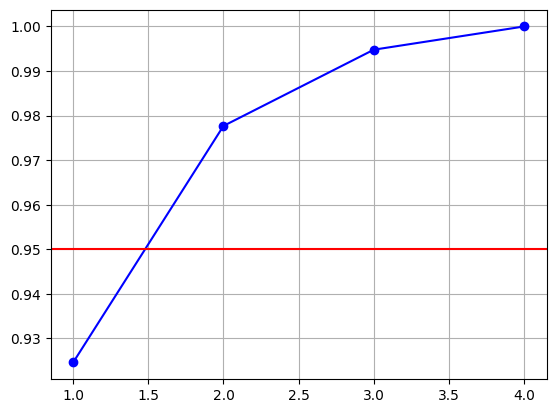

In [131]:
mypca.picture()

In [132]:
#task3

In [133]:
digits = datasets.load_digits()
x = digits.data
y = digits.target

In [134]:
pca = myPCA().fit(x)

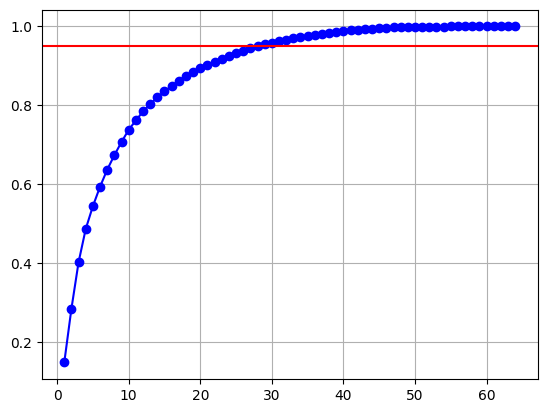

In [135]:
pca.picture()

In [136]:
import pandas as pd
from tqdm.notebook import tqdm

In [137]:
pd.DataFrame(np.array([range(1, 65), pca.cs ,[cross_val_score(model, pca.transform(x, components=component), y, cv=3).mean() for component in tqdm(range(1, 65))]]).T)

  0%|          | 0/64 [00:00<?, ?it/s]

,0,1,2
0,1.0,0.148906,0.365053
1,2.0,0.285094,0.589316
2,3.0,0.403040,0.682805
3,4.0,0.487139,0.773511
4,5.0,0.544964,0.821925
...,...,...,...
59,60.0,1.000000,0.928770
60,61.0,1.000000,0.928214
61,62.0,1.000000,0.928214
62,63.0,1.000000,0.928214


In [138]:
#task 4

In [139]:
from numpy.linalg import svd

class svdPCA:
  def __init__(self):
    pass

  def fit(self, x):
    centered = x - np.mean(x, axis = 0)
    self.u, self.s, self.v = svd(centered)
    return self

  def transform(self, x, components:int=4):
    centured = x - x.mean(axis = 0)
    return centured @ (vt.T[:, : components])

  def fit_transform(self, x, components = 4):
    self.fit(x)
    return self.transform(x, components=components)



In [140]:
x, y = make_regression(n_samples=10, n_features = 5);
centured = x - x.mean(axis=0)

In [141]:
pca = myPCA().fit(x)
svdpca = svdPCA().fit(x)

In [142]:
u, s, vt = svd(centured)

In [143]:
# сингулярные значения это корни из собственных
# главные компоненты хранятся в матрице v
(s / np.linalg.norm(s)) / (np.sqrt(pca.c) / np.linalg.norm(np.sqrt(pca.c)))

array([1., 1., 1., 1., 1.])

In [144]:
pca.fit_transform(x, components = 1)

array([[-0.37303962],
       [-0.74438812],
       [ 2.17380442],
       [ 0.32745204],
       [ 0.37571605],
       [ 1.79565265],
       [ 0.43586816],
       [-1.8457    ],
       [-0.3842694 ],
       [-1.76109618]])

In [145]:
svdpca.transform(x, 1)

array([[-0.37303962],
       [-0.74438812],
       [ 2.17380442],
       [ 0.32745204],
       [ 0.37571605],
       [ 1.79565265],
       [ 0.43586816],
       [-1.8457    ],
       [-0.3842694 ],
       [-1.76109618]])

In [146]:
#task 5

In [147]:
import re
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [149]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [150]:
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews -p /content/sample_data/lab9;
!unzip /content/sample_data/lab9/imdb-dataset-of-50k-movie-reviews.zip -d /content/sample_data/lab9;


Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
License(s): other
 35% 9.00M/25.7M [00:00<00:00, 35.9MB/s]
100% 25.7M/25.7M [00:00<00:00, 85.4MB/s]
Archive:  /content/sample_data/lab9/imdb-dataset-of-50k-movie-reviews.zip
  inflating: /content/sample_data/lab9/IMDB Dataset.csv  


In [151]:
def preprocess_text(text):
    text = text.lower()

    text = re.sub(r'[^\w\s]', '', text)

    words = word_tokenize(text)

    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]

    return ' '.join(words)


text = "I running love programming in Python, and I enjoy solving coding challenges!"

processed_text = preprocess_text(text)
print(processed_text)


run love program python enjoy solv code challeng


In [152]:
data = pd.read_csv('/content/sample_data/lab9/IMDB Dataset.csv')

In [153]:
data["review"] = data["review"].apply(preprocess_text)


In [154]:
y = np.array([x == "positive" for x in data['sentiment']]).astype(int)

In [155]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data["review"].values)

In [156]:
from sklearn.decomposition import TruncatedSVD
n_components = 1000
svd = TruncatedSVD(n_components=n_components)
X_reduced = svd.fit_transform(X)

print(X_reduced.shape)

# Выводим долю объясненной дисперсии для каждой компоненты
print("\nДоля объясненной дисперсии для каждой компоненты:")
print(svd.explained_variance_ratio_)

# Общая доля объясненной дисперсии
print("\nОбщая доля объясненной дисперсии (сумма):")
print(np.sum(svd.explained_variance_ratio_))


(50000, 1000)

Доля объясненной дисперсии для каждой компоненты:
[0.00356386 0.00504499 0.00351895 0.00288248 0.00248497 0.00209566
 0.00178287 0.00166156 0.00163198 0.00152709 0.00148072 0.00138902
 0.00132826 0.00129336 0.00126701 0.00124611 0.00120951 0.00116609
 0.00114003 0.0011194  0.00110663 0.00109702 0.00106401 0.00105329
 0.00103229 0.00100695 0.00098378 0.00097469 0.00096958 0.00096376
 0.00095363 0.00094479 0.0009334  0.00092144 0.0009081  0.00089932
 0.00088194 0.00087608 0.00087068 0.00085969 0.00084956 0.00083738
 0.00082766 0.00082355 0.00081186 0.00080301 0.0008008  0.0007967
 0.0007894  0.00078508 0.00077152 0.00076996 0.00076363 0.00076294
 0.00076145 0.00074931 0.00074028 0.00073839 0.00073229 0.00072517
 0.00072211 0.0007212  0.00071808 0.00071377 0.0007059  0.00070384
 0.00069488 0.00069369 0.00069226 0.00068659 0.00068374 0.00067796
 0.00067704 0.00067327 0.00066846 0.00066757 0.00066488 0.00065806
 0.00065579 0.0006529  0.00065136 0.00064911 0.00064676 0.0006460

In [159]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


model = LogisticRegression(penalty=None)
print(cross_val_score(model, X_reduced, y, cv=5).mean())

#кайф



0.88124


In [160]:
#task 6

In [161]:
import cv2

In [162]:
gray_image = cv2.imread('tree.jpg', cv2.IMREAD_GRAYSCALE)

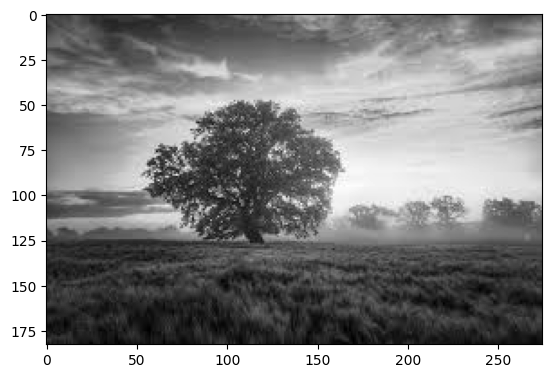

In [163]:
plt.imshow(gray_image, cmap='gray')
plt.show()

In [168]:
class picPCA(myPCA):
  def transform(self, x, components: int = None, p = 0.95):
    mean =  np.mean(x)
    if components is None:
      top_k_vectors = self.vectors.T[:, :np.argmax(self.cs > p)]
    else:
      top_k_vectors = self.vectors.T[:,:components]
    centered = (x - mean)
    projection = (centered @ top_k_vectors)
    return ((projection @ top_k_vectors.T) + mean)


In [175]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive, fixed, widgets


pc = picPCA().fit(gray_image)
def plot( s):

  ax = plt.figure().add_subplot()
  plt.imshow(pc.transform(gray_image, components=s).astype(int), cmap='gray')
  plt.show()


interactive_plot = interactive(plot, s=(2,265,1))
interactive_plot

interactive(children=(IntSlider(value=133, description='s', max=265, min=2), Output()), _dom_classes=('widget-…

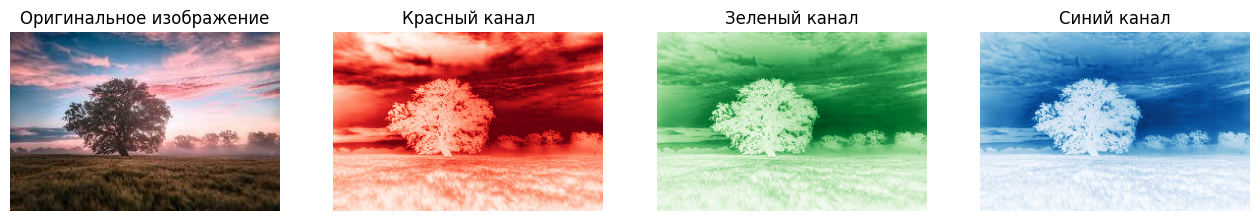

In [176]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

image_path = "/content/tree.jpg"
image = io.imread(image_path)

red, green, blue = image[:,:,0],image[:,:,1],image[:,:,2]
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

axes[0].imshow(image)
axes[0].set_title("Оригинальное изображение")
axes[0].axis('off')

axes[1].imshow(red, cmap='Reds')
axes[1].set_title("Красный канал")
axes[1].axis('off')

axes[2].imshow(green, cmap='Greens')
axes[2].set_title("Зеленый канал")
axes[2].axis('off')

axes[3].imshow(blue, cmap='Blues')
axes[3].set_title("Синий канал")
axes[3].axis('off')

plt.show()


In [177]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive, fixed, widgets


pc_red = picPCA().fit(red)
pc_green = picPCA().fit(green)
pc_blue = picPCA().fit(blue)

pc_red = picPCA().fit(red)
def plot_(s):

  new_red = pc_red.transform(red, s).astype(int)
  new_green =pc_green.transform(blue, s).astype(int)
  new_blue = pc_blue.transform(blue, s).astype(int)
  reconstructed_image = np.stack([new_red, new_green, new_blue], axis=-1)

  ax = plt.figure().add_subplot()
  plt.imshow(reconstructed_image, cmap='gray')
  plt.show()


interactive_plot = interactive(plot_, s=(2,265,1))
interactive_plot

interactive(children=(IntSlider(value=133, description='s', max=265, min=2), Output()), _dom_classes=('widget-…